In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.stats import bernoulli
from scipy.stats import cauchy

10
25
50
100
250


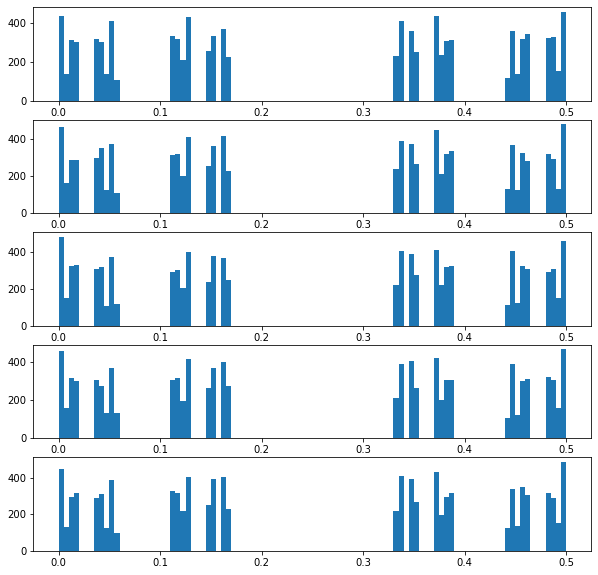

In [17]:
# problem 5
# write function that simulates from Cantor distribution
# with truncated sum up to m

def get_cantor(n, m):
    X = bernoulli.rvs(p=0.5, size=(n, m))
    coeffs = 3 ** np.tile(np.arange(1, m + 1),(n, 1))
    return np.sum(X / coeffs, axis=1)

n = 10000
m_i = [10, 25, 50, 100, 250]

fig, ax = plt.subplots(5, 1, figsize=(10, 10))

for i, m in enumerate(m_i):
    X_rvs = get_cantor(n, m)
    ax[i].hist(X_rvs, bins=100)

In [8]:
# problem 6: generate discrete random variables with pmf

x = np.array([1,2,3])
p = np.array([1/2, 1/4, 1/4])
n = 100

def generate_discrete(n, x, p):
    if np.sum(p) != 1.0 or np.min(p) < 0:
        raise Exception('not a valid distribution')
    cdf = np.cumsum(p)
    U = np.random.rand(n,1)
    locs = np.argmax((U <= np.tile(cdf, (n, 1))), axis=1)
    return x[locs]

generate_discrete(n, x, p)

array([1, 3, 2, 3, 1, 3, 1, 1, 3, 2, 2, 1, 3, 1, 1, 1, 1, 2, 3, 1, 3, 1,
       2, 1, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 1, 3, 1, 2, 3, 2, 1, 3, 1, 1,
       2, 2, 1, 1, 1, 1, 3, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 3, 2, 2, 2, 2,
       2, 3, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 3, 2, 1, 1, 1, 2, 1, 2, 2,
       3, 3, 2, 1, 2, 3, 1, 2, 1, 1, 1, 2])

<ipython-input-80-568ebf23bc0e>:8: RuntimeWarning: invalid value encountered in true_divide
  S_2_m = np.cumsum((X - X_bar_m)**2) / np.arange(0, n)


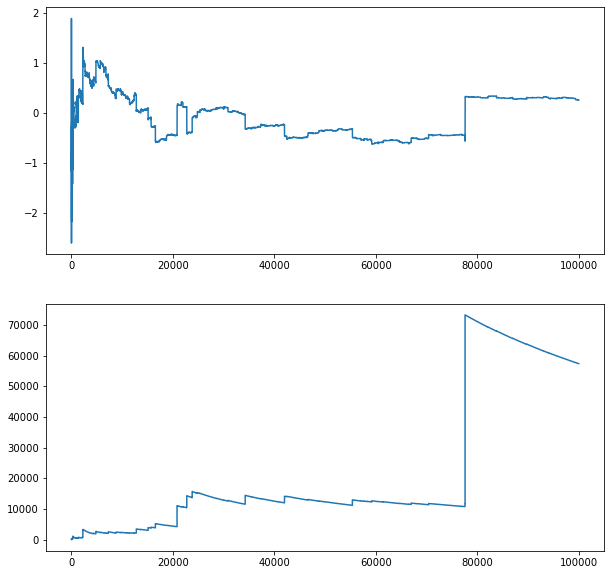

In [80]:
# problem 7: sample from cauchy distribution, 
# plot running mean

n = 100000

X = cauchy().rvs(n)
X_bar_m = np.cumsum(X) / np.arange(1, n + 1)
S_2_m = np.cumsum((X - X_bar_m)**2) / np.arange(0, n)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(X_bar_m)
ax[1].plot(S_2_m)